# <font color= Blue> Retail Giant Sales Forecasting Assignment- Lakshmikanth

## <FONT COLOR = green>Business Problem
- Global Mart is an online supergiant store that has worldwide operations. This store takes orders and delivers across the globe and deals with all the major product categories — consumer, corporate & home office.

- As a sales manager for this store, you have to forecast the sales of the products for the next 6 months, so that we have a proper estimate and can plan your inventory and business processes accordingly.

In [1]:
# Importing necessary packages  
import pandas as pd 
import numpy as np 
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

# To surpress the warinigs
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading and understanding of data

df = pd.read_csv('Global+Superstore+Data.csv')
# df['Order Date'] = pd.to_datetime(df['Order Date']).apply(lambda x: x.strftime('%Y-%m')).astype(str)

# df['Order Date'] = pd.to_datetime(df['Order Date']).dt.to_period('m')
df.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


In [3]:
#  Inspeting shape of data frame

df.shape

(51290, 5)

- There are total 51290 rows and 5 columns

In [4]:
# Inspecting data frame for data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
Order Date    51290 non-null object
Segment       51290 non-null object
Market        51290 non-null object
Sales         51290 non-null float64
Profit        51290 non-null float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


In [5]:
# Inspecting the statiscal summary of numerical columns

df.describe()

,Sales,Profit
count,51290.000000,51290.000000
mean,246.490581,28.610982
std,487.565361,174.340972
min,0.444000,-6599.978000
25%,30.758625,0.000000
50%,85.053000,9.240000
75%,251.053200,36.810000
max,22638.480000,8399.976000


In [6]:
# Converting the date format and replacing in 'Order Date' column with month and year together.

df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y').dt.to_period('M')
df.head(12)

,Order Date,Segment,Market,Sales,Profit
0,2012-07,Consumer,US,2309.650,762.1845
1,2013-02,Corporate,APAC,3709.395,-288.7650
2,2013-10,Consumer,APAC,5175.171,919.9710
3,2013-01,Home Office,EU,2892.510,-96.5400
4,2013-11,Consumer,Africa,2832.960,311.5200
5,2013-06,Corporate,APAC,2862.675,763.2750
6,2011-11,Consumer,APAC,1822.080,564.8400
7,2012-04,Consumer,APAC,5244.840,996.4800
8,2014-10,Corporate,US,5083.960,1906.4850
9,2012-01,Consumer,US,4297.644,-1862.3124


In [7]:
# Concating column 'Market' with 'Segment'

df['market_segment'] = df['Market'].astype(str) + ['_']+ df['Segment']
df.head()

,Order Date,Segment,Market,Sales,Profit,market_segment
0,2012-07,Consumer,US,2309.650,762.1845,US_Consumer
1,2013-02,Corporate,APAC,3709.395,-288.7650,APAC_Corporate
2,2013-10,Consumer,APAC,5175.171,919.9710,APAC_Consumer
3,2013-01,Home Office,EU,2892.510,-96.5400,EU_Home Office
4,2013-11,Consumer,Africa,2832.960,311.5200,Africa_Consumer


In [8]:
# Aggregating the total values of profit for 21 market_segments by its ordered month and year using pivot table

df_sum = df.pivot_table(index='Order Date', values='Profit', columns='market_segment', aggfunc='sum')
df_sum.head()

market_segment,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,...,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,991.2825,11.5998,86.4423,475.683,219.096,856.710,3.12,5.7,NaN,-2099.364,...,116.400,-845.8290,501.9315,975.360,1976.98976,1150.88400,-106.48800,762.8067,300.9145,1383.0499
2011-02,1338.8688,4358.8254,-417.4128,1441.926,-490.551,820.302,23.31,NaN,87.99,267.060,...,216.690,-1808.1180,2988.4065,-181.041,902.37752,721.25420,300.19936,500.2865,307.2995,58.1420
2011-03,3747.1632,1213.3386,923.7492,322.140,-586.716,67.320,335.55,NaN,84.03,1598.718,...,78.972,2480.5410,736.9890,503.223,2585.17924,39.07512,285.46400,597.2773,333.0515,-431.5989
2011-04,3846.4746,71.0265,657.1080,292.122,776.691,500.136,55.08,NaN,NaN,-300.879,...,-420.090,2496.6405,1056.1785,63.858,387.72148,259.25600,-421.73440,1155.0757,1393.3828,940.3767
2011-05,3639.9423,2534.1672,-272.1717,110.004,241.338,34.926,77.97,NaN,NaN,568.302,...,262.968,254.0805,1586.2740,201.102,1002.34724,-531.74444,-240.11600,698.9171,2063.5013,-23.7088


In [9]:
#  Inspecting the shape after summing up the multiples data entities

df_sum.shape

(48, 21)

- Finally there are 48 months data for 21 market_segmets

### <font color =green> Train-Test Split
- Choosen 42 months for train data and 6 months as the test data.

In [10]:
# Splitting the new pivot data into training and test set (training data = 42 months and test data = 6 months)

train_len = 42
train = df_sum[0:train_len] # first 42 months as training set
test = df_sum[train_len:] # last 6 months as out-of-time test set

In [11]:
# Inspecting the train test data

print('Train_size:',train.shape)
print('Test_size:',test.shape)

Train_size: (42, 21)
Test_size: (6, 21)


### <font color = green> Calculate the coefficient of variation (CoV) on the profit for each of the 21 market segments on the train data, following are the steps to approach:
   

1. From Orginal Data set , filter out only rows which have the lowest COV market segment 

2. Drop all otehr columns except the order date and sales

3. Group by order date and use aggregate funciton sum 

4. Set Order date as index

5. Convert the order date to todate time stamp
( Code given in another discussion is data1 = data1.to_timestamp())

6.  Peform sesaonal, trend andresidual analaysis

7. now split the data set to train and test

8. Continue with your model building

In [12]:
# finding the Coefficient of the Variance

mean = np.mean(train)
std = np.std(train)

COV = std/mean
COV = pd.DataFrame(COV)
COV = COV.reset_index()

COV.columns = ['Market_Segment','Most Consistent']
COV.sort_values(by= 'Most Consistent', ascending= True, inplace = True )
COV

,Market_Segment,Most Consistent
0,APAC_Consumer,0.596404
12,EU_Consumer,0.647485
15,LATAM_Consumer,0.680684
13,EU_Corporate,0.689346
1,APAC_Corporate,0.731926
16,LATAM_Corporate,0.880260
19,US_Corporate,1.027209
2,APAC_Home Office,1.048817
18,US_Consumer,1.095295
14,EU_Home Office,1.114681


In [13]:
# Selected the data only with Market_Segemnt - APACConsumer 
# beacause it has low Cov- and it is Consistent market_segment and Create a new dataset.

df_new = df[df['market_segment'] =='APAC_Consumer']
df_new.head()

,Order Date,Segment,Market,Sales,Profit,market_segment
2,2013-10,Consumer,APAC,5175.171,919.971,APAC_Consumer
6,2011-11,Consumer,APAC,1822.080,564.840,APAC_Consumer
7,2012-04,Consumer,APAC,5244.840,996.480,APAC_Consumer
14,2013-06,Consumer,APAC,3701.520,1036.080,APAC_Consumer
29,2012-02,Consumer,APAC,1878.720,582.360,APAC_Consumer


In [14]:
# Drop all other columns except 'Order Date' and 'Sales'

df_new = df_new.drop(columns=['Segment','Market','Profit','market_segment'])

In [15]:
#  Inspecting shape after dropping the columns

df_new.shape

(5699, 2)

In [16]:
# Making 'Order Date' as index for making time series fore casting

df_new = df_new.set_index('Order Date')
df_new.head()

,Sales
Order Date,
2013-10,5175.171
2011-11,1822.080
2012-04,5244.840
2013-06,3701.520
2012-02,1878.720


In [17]:
# Summing up the multiple data entities by grouping all the sales values by order date of APAC Consumer

df_new = df_new.groupby("Order Date").sum()
df_new.head()

,Sales
Order Date,
2011-01,15711.7125
2011-02,12910.8588
2011-03,19472.5632
2011-04,15440.3046
2011-05,24348.9723


In [18]:
# aster summing up inspecting the shape of data frame 

df_new.shape

(48, 1)

In [19]:
# Inspecting the data types

df_new.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 48 entries, 2011-01 to 2014-12
Freq: M
Data columns (total 1 columns):
Sales    48 non-null float64
dtypes: float64(1)
memory usage: 768.0 bytes


In [20]:
# converting Order date to current local date

df_new= df_new.to_timestamp()
df_new.head()

,Sales
Order Date,
2011-01-01,15711.7125
2011-02-01,12910.8588
2011-03-01,19472.5632
2011-04-01,15440.3046
2011-05-01,24348.9723


In [21]:
# Inspecting the data types after converting to time stamp

df_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2011-01-01 to 2014-12-01
Freq: MS
Data columns (total 1 columns):
Sales    48 non-null float64
dtypes: float64(1)
memory usage: 768.0 bytes


# <font color= green>Time Series Analysis

## Plotting Time Series Data


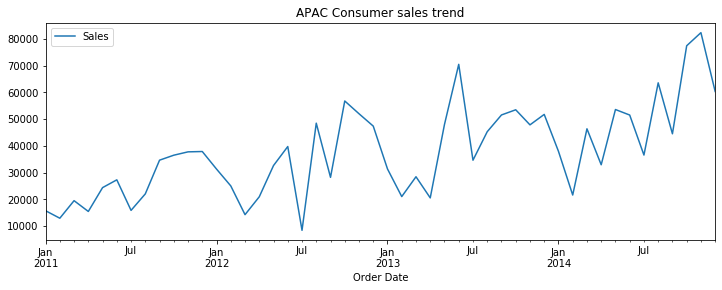

In [22]:
# Plot sales series data of APAC Consumer

df_new.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('APAC Consumer sales trend')
plt.show(block=False)

# Outlier Detection

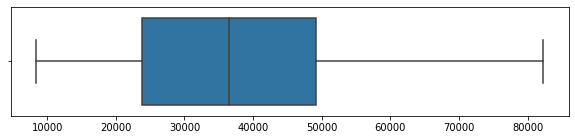

In [23]:
# Outlier detection by Box Plot

import seaborn as sns
fig = plt.subplots(figsize=(10, 2))
ax = sns.boxplot(x=df_new,whis=1.5)

# <font color = red> There are no outlier in APAC Consumer data.

# Histogram plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000279F2B9E088>]],
      dtype=object)

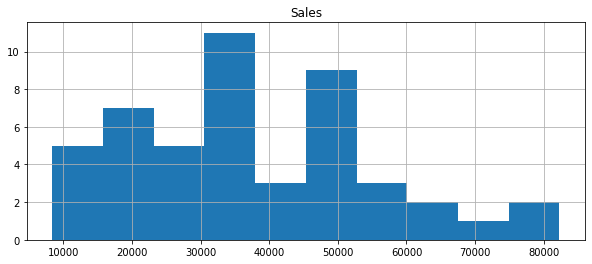

In [24]:
fig = df_new.hist(figsize = (10,4))
fig

### <font color =red> Higher sales are observed at 30000 to 38000 and 45000 to 55000 for APAC consumer

## <font color= blue> Time Series Decomposition

## Additive Seasonal Decomposition

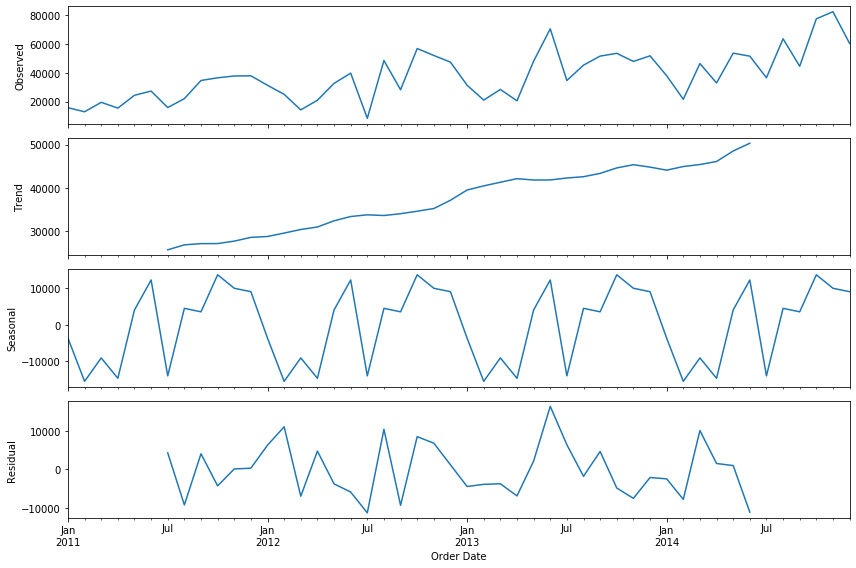

In [25]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(df_new, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

# Multiplicative Seasonal Decomposition

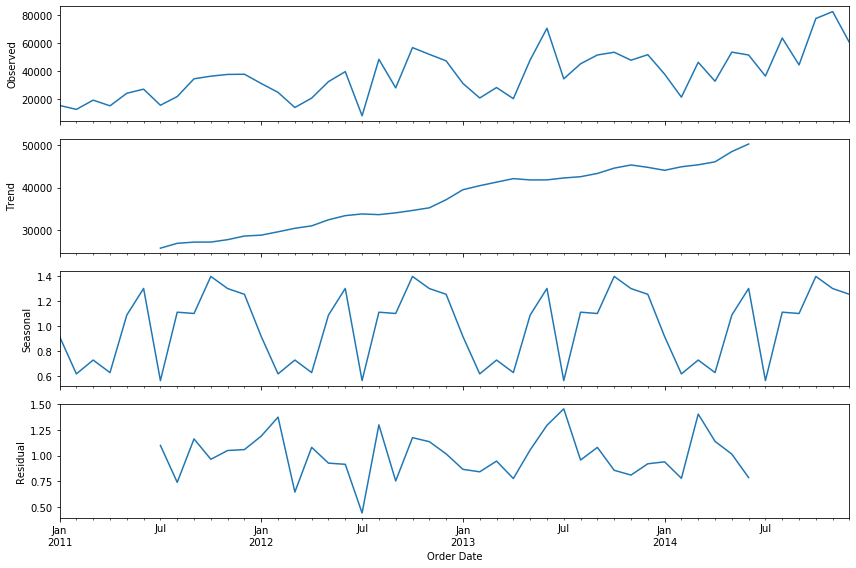

In [26]:
decomposition = sm.tsa.seasonal_decompose(df_new, model='multiplicative') # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

# Model Building and Evaluattion- Time Series Forecast

## Split Time Series data into Training and Test set

In [27]:
train_len = 42
train = df_new[0:train_len]
test = df_new[train_len:] 

# Simple Time Series Methods

## <font color=green> 1. Naive method

In [28]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Sales'][train_len-1]

### Plot train, test and forecast

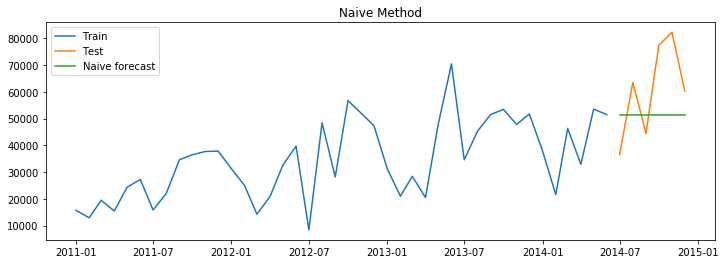

In [29]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

### Calculate RMSE and MAPE

In [30]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_naive['naive_forecast'])/test['Sales'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86


## <font color= green>2. Simple Average Method

In [31]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Sales'].mean()

### Plot train, test and forecast

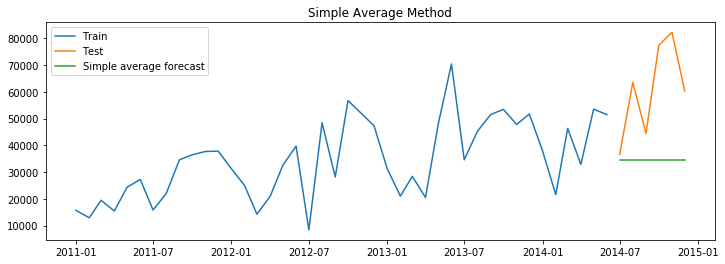

In [32]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

### Calculate RMSE and MAPE

In [33]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_avg['avg_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18


## <font color= green>3. Simple Moving Average Method

In [34]:
y_hat_sma = df_new.copy()
ma_window = 3

y_hat_sma['sma_forecast'] = df_new['Sales'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

### Plot train, test and forecast

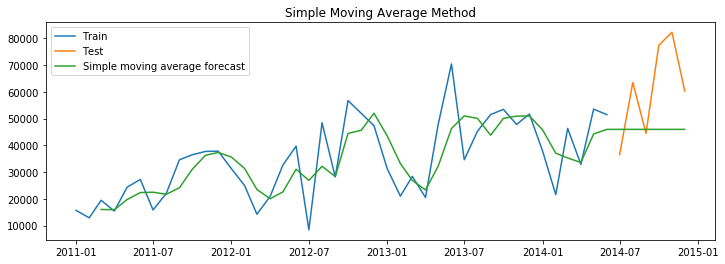

In [35]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

### Calculate RMSE and MAPE

In [36]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sma['sma_forecast'][train_len:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,22019.48,27.55


# Exponential smoothing methods

## <font color =green>4. Simple exponential smoothing

In [37]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(train['Sales'])
model_fit = model.fit(smoothing_level=0.2,optimized=True)

model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)


### Plot train, test and forecast

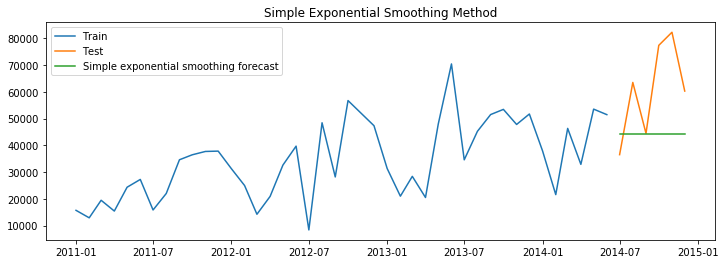

In [38]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

### Calculate RMSE and MAPE

In [39]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ses['ses_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,22019.48,27.55
0,Simple exponential smoothing forecast,23112.16,27.82


# <font color =green>5. Holt's method with trend

In [40]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=True)

print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2, 'smoothing_slope': 0.01, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 16858.854330097278, 'initial_slope': 730.3234258358732, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

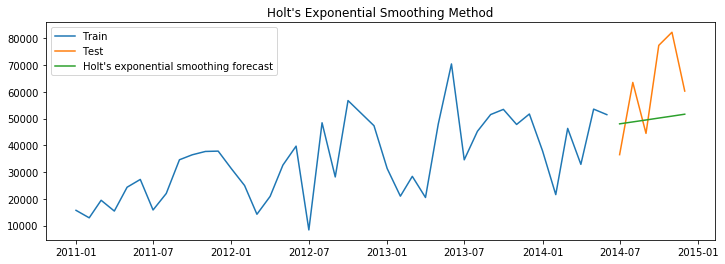

In [41]:
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

### Calculate RSME and MAPE

In [42]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_holt['holt_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,22019.48,27.55
0,Simple exponential smoothing forecast,23112.16,27.82
0,Holt's exponential smoothing method,19026.47,25.60


# <font color =green>6. Holt Winters' additive method with trend and seasonality

In [43]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)

print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.052631578947367676, 'smoothing_slope': 0.05263157894736842, 'smoothing_seasonal': 0.10526315789474944, 'damping_slope': nan, 'initial_level': 29061.291899999593, 'initial_slope': 730.4167145833245, 'initial_seasons': array([-13349.5794, -16150.4331,  -9588.7287, -13620.9873,  -4712.3196,
        -1801.2723, -13218.4602,  -7049.0553,   5551.893 ,   7410.7551,
         8661.312 ,   8785.6992]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

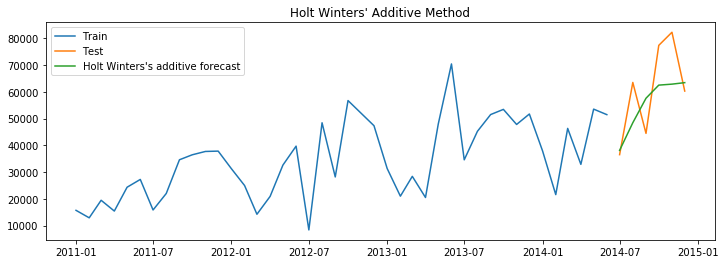

In [44]:
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

### Calculate RMSE and MAPE

In [45]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwa['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,22019.48,27.55
0,Simple exponential smoothing forecast,23112.16,27.82
0,Holt's exponential smoothing method,19026.47,25.60
0,Holt Winters' additive method,12971.01,17.61


# <font color =green>7. Holt Winter's multiplicative method with trend and seasonality

In [46]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.05263157894736842, 'smoothing_slope': 0.05263157894736842, 'smoothing_seasonal': 0.21052631578947367, 'damping_slope': nan, 'initial_level': 29061.291900000004, 'initial_slope': 730.4167145833347, 'initial_seasons': array([0.54064054, 0.44426307, 0.67005153, 0.53130138, 0.83784893,
       0.93801816, 0.54515235, 0.75744178, 1.19104082, 1.25500432,
       1.29803603, 1.3023162 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\lakshmikanth\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


### Plot train, test and forecast

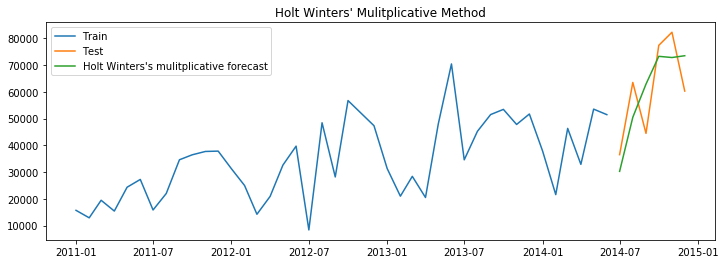

In [47]:
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

### Calculate RMSE and MAPE

In [48]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwm['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,22019.48,27.55
0,Simple exponential smoothing forecast,23112.16,27.82
0,Holt's exponential smoothing method,19026.47,25.60
0,Holt Winters' additive method,12971.01,17.61
0,Holt Winters' multiplicative method,11753.42,19.62


# Auto Regressive methods

# <font color =green>8. Stationarity vs non-stationary time series

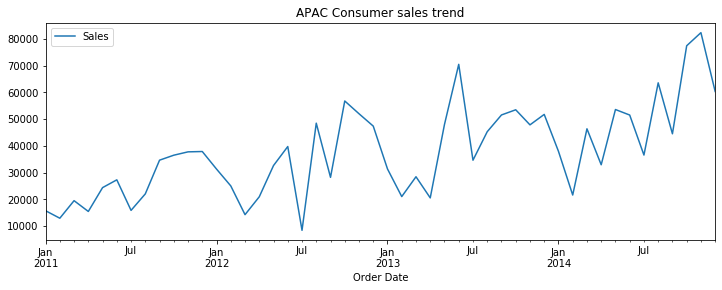

In [49]:
df_new['Sales'].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('APAC Consumer sales trend')
plt.show(block=False)

### <font color= red>Augmented Dickey-Fuller (ADF) test- Hypothesis Analysis

In [50]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_new['Sales'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -2.220857
Critical Values @ 0.05: -2.93
p-value: 0.198763


### <font color= red> Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test- Testing a null hypothesis

In [51]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(df_new['Sales'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.595515
Critical Values @ 0.05: 0.46
p-value: 0.023044


### <font color= green>Box Cox transformation to make variance constant

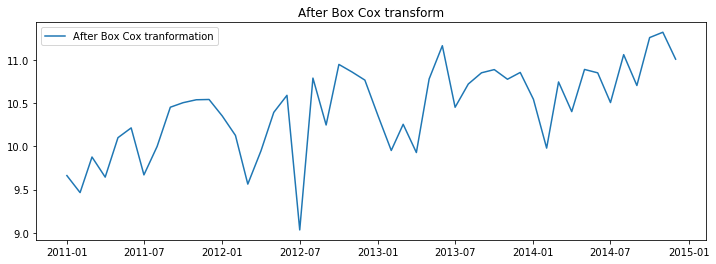

In [52]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(df_new['Sales'], lmbda=0), index = df_new.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

### Differencing to remove trend

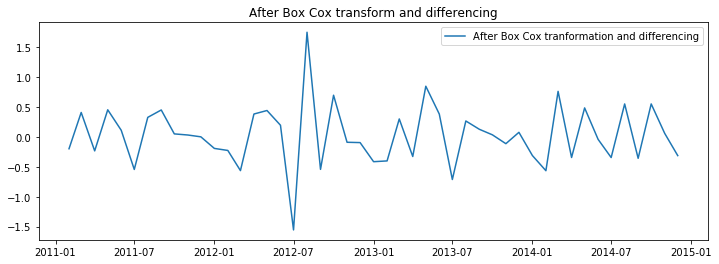

In [53]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), df_new.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [54]:
# removing NA values in rows

data_boxcox_diff.dropna(inplace=True)

In [55]:
# inspecting tail 

data_boxcox_diff.tail()

Order Date
2014-08-01    0.553405
2014-09-01   -0.356405
2014-10-01    0.553748
2014-11-01    0.061479
2014-12-01   -0.311004
Freq: MS, dtype: float64

### Augmented Dickey-Fuller (ADF) test- on data_boxcox_diff

In [56]:
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -5.769275
Critical Values @ 0.05: -2.95
p-value: 0.000001


### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test- on data_boxcox_diff

In [57]:
kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.135659
Critical Values @ 0.05: 0.46
p-value: 0.100000


C:\Users\lakshmikanth\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1710: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


## Autocorrelation function (ACF)

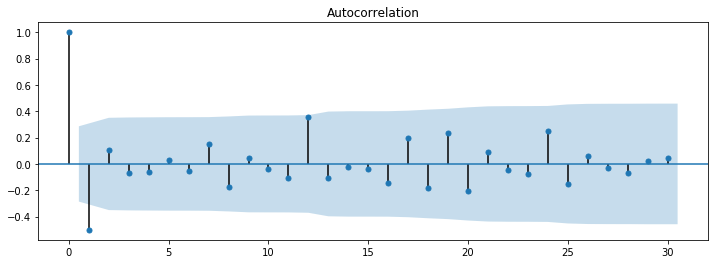

In [58]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()

## Partial autocorrelation function (PACF)

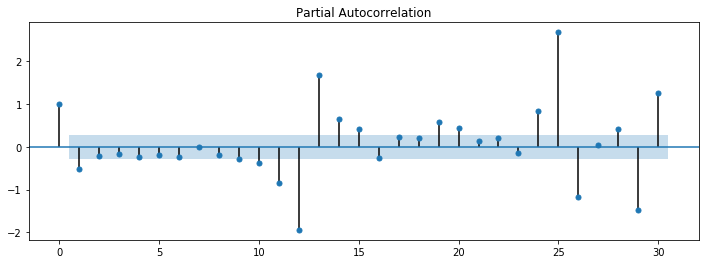

In [59]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()

## <font color= green>Train- Test Split on boxcox

In [60]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

In [61]:
train_data_boxcox_diff.head()

Order Date
2011-02-01   -0.196338
2011-03-01    0.410938
2011-04-01   -0.232025
2011-05-01    0.455508
2011-06-01    0.112932
Freq: MS, dtype: float64

## 1. Auto regression method (AR)

In [62]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

const      0.031320
ar.L1.y   -0.483978
dtype: float64


### Recover Original Time Series

In [63]:
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

### Plot train, test and forecast

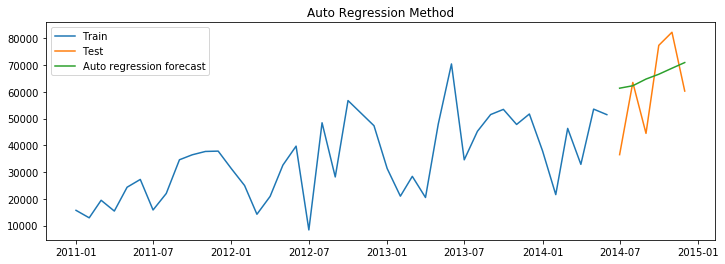

In [64]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

### Calculate RMSE and MAPE

In [65]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ar['ar_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,22019.48,27.55
0,Simple exponential smoothing forecast,23112.16,27.82
0,Holt's exponential smoothing method,19026.47,25.60
0,Holt Winters' additive method,12971.01,17.61
0,Holt Winters' multiplicative method,11753.42,19.62
0,Autoregressive (AR) method,15505.02,27.27


## 2. Moving average method (MA)

In [66]:
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)

const      0.022694
ma.L1.y   -1.000000
dtype: float64


### Recover original time series

In [67]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

### Plot train, test and forecast

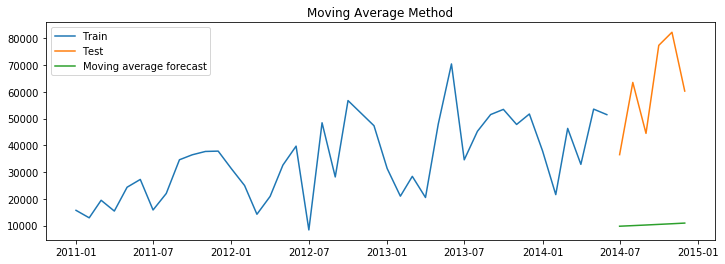

In [68]:
plt.figure(figsize=(12,4))
plt.plot(df_new['Sales'][:train_len], label='Train')
plt.plot(df_new['Sales'][train_len:], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

### Calculate RMSE and MAPE

In [69]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ma['ma_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,22019.48,27.55
0,Simple exponential smoothing forecast,23112.16,27.82
0,Holt's exponential smoothing method,19026.47,25.60
0,Holt Winters' additive method,12971.01,17.61
0,Holt Winters' multiplicative method,11753.42,19.62
0,Autoregressive (AR) method,15505.02,27.27
0,Moving Average (MA) method,52903.35,81.64


## 3. Auto regression moving average method (ARMA)

In [70]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

const      0.022810
ar.L1.y    0.115922
ma.L1.y   -0.999969
dtype: float64


### Recover original time series

In [71]:
y_hat_arma = data_boxcox_diff.copy()

y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

### Plot train, test and forecast

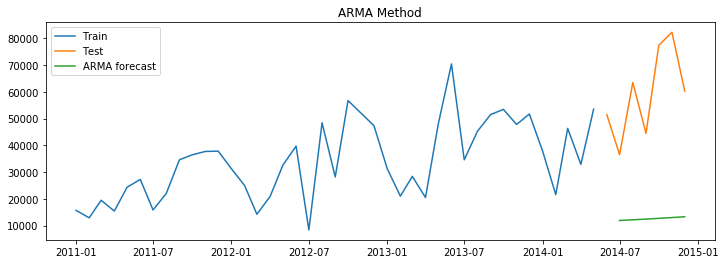

In [72]:
plt.figure(figsize=(12,4))
plt.plot(df_new['Sales'][:train_len-1], label='Train')
plt.plot(df_new['Sales'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

### Calculate RMSE and MAPE

In [73]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arma['arma_forecast'][train_len-1:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,22019.48,27.55
0,Simple exponential smoothing forecast,23112.16,27.82
0,Holt's exponential smoothing method,19026.47,25.60
0,Holt Winters' additive method,12971.01,17.61
0,Holt Winters' multiplicative method,11753.42,19.62
0,Autoregressive (AR) method,15505.02,27.27
0,Moving Average (MA) method,52903.35,81.64
0,Autoregressive moving average (ARMA) method,50757.93,77.66


## 4. Auto regressive integrated moving average (ARIMA)

In [74]:
model = ARIMA(train_data_boxcox, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.params)

const        0.022810
ar.L1.D.y    0.115922
ma.L1.D.y   -0.999969
dtype: float64


### Recover original time series forecast

In [75]:
y_hat_arima = data_boxcox_diff.copy()

y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

### Plot train, test and forecast

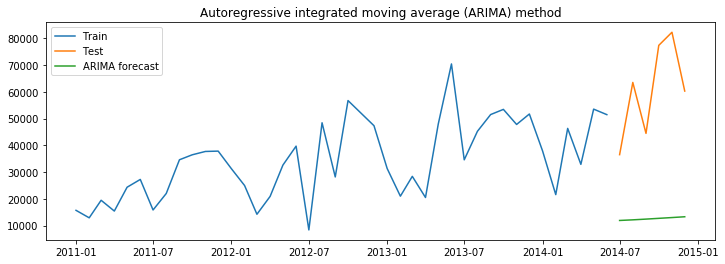

In [76]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

### Calculate RMSE and MAPE

In [77]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arima['arima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,22019.48,27.55
0,Simple exponential smoothing forecast,23112.16,27.82
0,Holt's exponential smoothing method,19026.47,25.60
0,Holt Winters' additive method,12971.01,17.61
0,Holt Winters' multiplicative method,11753.42,19.62
0,Autoregressive (AR) method,15505.02,27.27
0,Moving Average (MA) method,52903.35,81.64
0,Autoregressive moving average (ARMA) method,50757.93,77.66


## 5. Seasonal auto regressive integrated moving average (SARIMA)

In [78]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 0, 12)) 
model_fit = model.fit()
print(model_fit.params)

ar.L1      -0.060969
ma.L1      -0.995440
ar.S.L12   -0.709637
sigma2      0.084622
dtype: float64


### Recover original time series forecast

In [79]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

### Plot train, test and forecast

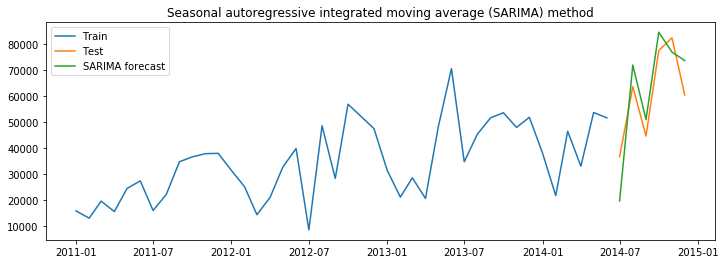

In [80]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

### Calculate RMSE and MAPE

In [81]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,22019.48,27.55
0,Simple exponential smoothing forecast,23112.16,27.82
0,Holt's exponential smoothing method,19026.47,25.60
0,Holt Winters' additive method,12971.01,17.61
0,Holt Winters' multiplicative method,11753.42,19.62
0,Autoregressive (AR) method,15505.02,27.27
0,Moving Average (MA) method,52903.35,81.64
0,Autoregressive moving average (ARMA) method,50757.93,77.66


In [83]:
results.reset_index()

,index,Method,RMSE,MAPE
0,0,Naive method,18774.05,26.86
1,0,Simple average method,30846.00,38.18
2,0,Simple moving average forecast,22019.48,27.55
3,0,Simple exponential smoothing forecast,23112.16,27.82
4,0,Holt's exponential smoothing method,19026.47,25.60
5,0,Holt Winters' additive method,12971.01,17.61
6,0,Holt Winters' multiplicative method,11753.42,19.62
7,0,Autoregressive (AR) method,15505.02,27.27
8,0,Moving Average (MA) method,52903.35,81.64
9,0,Autoregressive moving average (ARMA) method,50757.93,77.66


## <font color= green>`Thank you`